____future____

make the target the next day close 
the things we use to predict that close as the previous day close and open

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes

In [3]:
df = pd.read_csv("/Users/zachadams/Stocks/stockCSV/FB.csv")
df

,date,1. open,2. high,3. low,4. close,5. volume
0,2020-03-13,163.53,170.79,157.60,170.2800,32950064.0
1,2020-03-12,159.54,166.60,154.34,154.4700,43266335.0
2,2020-03-11,174.01,175.88,167.66,170.2400,20397204.0
3,2020-03-10,174.67,178.29,169.50,178.1900,24517791.0
4,2020-03-09,169.60,175.00,165.19,169.5000,29949041.0
...,...,...,...,...,...,...
1962,2012-05-24,32.95,33.21,31.77,33.0300,50237200.0
1963,2012-05-23,31.37,32.50,31.36,32.0000,73600000.0
1964,2012-05-22,32.61,33.59,30.94,31.0000,101786600.0
1965,2012-05-21,36.53,36.66,33.00,34.0300,168192700.0


In [4]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'starting')

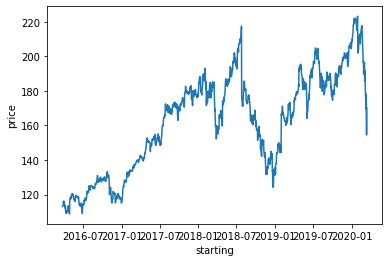

In [5]:
plt.plot(df['date'][:1000],df['4. close'][:1000])
plt.ylabel("price")
plt.xlabel("starting")

In [6]:
X = df.drop('4. close', axis = 1)
X = X.drop('date', axis = 1)
X = X.drop('5. volume', axis = 1)
X

,1. open,2. high,3. low
0,163.53,170.79,157.60
1,159.54,166.60,154.34
2,174.01,175.88,167.66
3,174.67,178.29,169.50
4,169.60,175.00,165.19
...,...,...,...
1962,32.95,33.21,31.77
1963,31.37,32.50,31.36
1964,32.61,33.59,30.94
1965,36.53,36.66,33.00


In [8]:
y = df['4. close']
y

0       170.2800
1       154.4700
2       170.2400
3       178.1900
4       169.5000
          ...   
1962     33.0300
1963     32.0000
1964     31.0000
1965     34.0300
1966     38.2318
Name: 4. close, Length: 1967, dtype: float64

In [59]:
size = 300
X_train = X[size:]
X_test = X[:size]
y_train = y[size:]
y_test = y[:size]
X_train

,1. open,2. high,3. low
300,134.69,137.17,131.12
301,128.99,137.51,128.56
302,134.45,134.64,129.95
303,135.34,135.92,132.20
304,132.44,134.99,129.67
...,...,...,...
1962,32.95,33.21,31.77
1963,31.37,32.50,31.36
1964,32.61,33.59,30.94
1965,36.53,36.66,33.00


In [73]:
mdl = neighbors.KNeighborsRegressor(n_neighbors = 2, weights = "distance", algorithm = "auto")
mdl.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='distance')

In [74]:
y_pred = mdl.predict(X_test)

In [75]:
from sklearn.metrics import mean_squared_error as mse

In [76]:
mse(y_pred,y_test)

4.543457144094006

In [77]:
pred_df = df.copy(deep = True)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 0, 'date')

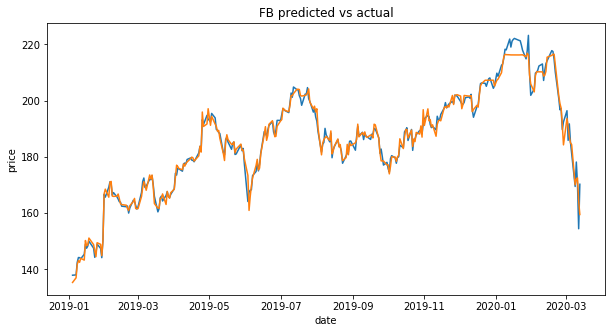

In [80]:

plt.figure(figsize = (10,5))
pred_df['4. close'][:size] = y_pred
plt.title(label = "FB predicted vs actual")
plt.plot(df['date'][:size], df['4. close'][:size])
plt.plot(pred_df['date'][:size], pred_df['4. close'][:size])
plt.ylabel("price")
plt.xlabel("date")

In [84]:
pred_df['4. close'][:size]

0      159.528874
1      164.271264
2      172.559994
3      172.018877
4      170.081081
          ...    
295    142.540896
296    143.124738
297    141.822149
298    137.020911
299    135.375016
Name: 4. close, Length: 300, dtype: float64

In [83]:
df['4. close'][:size]

0      170.28
1      154.47
2      170.24
3      178.19
4      169.50
        ...  
295    144.20
296    144.23
297    142.53
298    138.05
299    137.95
Name: 4. close, Length: 300, dtype: float64